In [1]:
import numpy as np
import pandas as pd
import heapq
import spotipy
import matplotlib.pyplot as plt

### Read data from the Billboard CSV File

Getting the data from the Midway iPython file generating the Billboard CSV File

In [2]:
data_frame = pd.read_csv('bilboard_new_data.csv', sep=",")

In [3]:
#There was some error while getting the data from the spotify API for the years from 1975 to 1977. Once that issue was resolved we created another csv file with the data of songs for those 3 years 
data_frame_1 = pd.read_csv('bilboard_77_to_75.csv', sep=",")
print(data_frame.shape)
print(data_frame_1.shape)
data_frame = pd.concat([data_frame, data_frame_1])
print(data_frame.shape)

(298700, 11)
(13400, 11)
(312100, 11)


In [4]:
data_frame.head()

,Unnamed: 0,index,i,date,title,artist,peakPos,lastPos,weeks,rank,isNew
0,0,59326,26,1958-08-11,Do You Want To Dance,Bobby Freeman,20,20,2,27,False
1,1,59327,27,1958-08-11,A Certain Smile,Johnny Mathis,22,22,2,28,False
2,2,59328,28,1958-08-11,Enchanted Island,The Four Lads,29,29,2,29,False
3,3,59329,29,1958-08-11,Moon Talk,Perry Como,30,37,2,30,False
4,4,59330,30,1958-08-11,What Am I Living For,Chuck Willis,25,25,2,31,False


In [5]:
data_frame_1.head()

,Unnamed: 0,index,i,date,title,artist,peakPos,lastPos,weeks,rank,isNew
0,0,5199,99,1975-01-04,Crazy Talk,Chilliwack,100,100,2,100,False
1,1,5126,26,1975-01-04,Get Dancin',Disco Tex & The Sex-O-Lettes Featuring Sir Mon...,27,35,7,27,False
2,2,5127,27,1975-01-04,Dancin' Fool,The Guess Who,28,30,7,28,False
3,3,5128,28,1975-01-04,I Feel A Song (In My Heart)/Don't Burn Down Th...,Gladys Knight And The Pips,21,23,13,29,False
4,4,5129,29,1975-01-04,From His Woman To You,Barbara Mason,30,38,6,30,False


In [6]:
data_frame['year'] = pd.to_datetime(data_frame['date']).dt.year

In [7]:
data_frame = data_frame.drop(['Unnamed: 0','index','i'], axis=1)

In [8]:
data_frame.head(27)

,date,title,artist,peakPos,lastPos,weeks,rank,isNew,year
0,1958-08-11,Do You Want To Dance,Bobby Freeman,20,20,2,27,False,1958
1,1958-08-11,A Certain Smile,Johnny Mathis,22,22,2,28,False,1958
2,1958-08-11,Enchanted Island,The Four Lads,29,29,2,29,False,1958
3,1958-08-11,Moon Talk,Perry Como,30,37,2,30,False,1958
4,1958-08-11,What Am I Living For,Chuck Willis,25,25,2,31,False,1958
5,1958-08-11,Think It Over,The Crickets,27,27,2,32,False,1958
6,1958-08-11,Rock-in Robin,Bobby Day,33,35,2,33,False,1958
7,1958-08-11,Bird Dog,The Everly Brothers,34,92,2,34,False,1958
8,1958-08-11,Stupid Cupid,Connie Francis,35,72,2,35,False,1958
9,1958-08-11,Blue Blue Day,Don Gibson,32,32,2,36,False,1958


In [9]:
g_dict = data_frame.groupby('year').groups

In [10]:
col_names = ['title','f_date','l_date']
values = []
for key in g_dict:
    temp = []
    ind = list(g_dict[key])
    temp.append(key)
    print(data_frame.ix[ind]['rank'].values.tolist()[0])
    if data_frame.ix[ind]['rank'].values.tolist()[0] == 1:
        print(data_frame.ix[ind]['title'].values.tolist())
    temp.append(data_frame.ix[ind]['rank'].values.tolist()[0])
#     break
#     temp.append(data_frame.ix[ind]['year'].tail(1).values[0])
#     values.append(temp)
# data = pd.DataFrame(data=values, columns=col_names)
# values

/home/jaytorasakar8/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/home/jaytorasakar8/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/jaytorasakar8/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


27
34
35
34
36
34
36
36
36
27
27
35
34
36
35
36
36
27
35
34
34
35
35
34
34
35
36
36
36
35
36
34
35
35
34
35
35
35
35
36
36
35
34
36
35
36
35
35
36
35
34
35
36
36
36
36
35
36
36
37
36


In [11]:
data_1 = data_frame[data_frame['rank']==1]

In [12]:
data_1.head(40)

,date,title,artist,peakPos,lastPos,weeks,rank,isNew,year
26,1958-08-11,Poor Little Fool,Ricky Nelson,1,1,2,1,False,1958
126,1958-08-18,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,1,2,3,1,False,1958
226,1958-08-25,Little Star,The Elegants,1,2,4,1,False,1958
325,1958-09-01,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,1,2,5,1,False,1958
426,1958-09-08,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,1,1,6,1,False,1958
526,1958-09-15,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,1,1,7,1,False,1958
626,1958-09-22,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,1,1,8,1,False,1958
725,1958-09-29,It's All In The Game,Tommy Edwards,1,3,7,1,False,1958
826,1958-10-06,It's All In The Game,Tommy Edwards,1,1,8,1,False,1958
925,1958-10-13,It's All In The Game,Tommy Edwards,1,1,9,1,False,1958


In [13]:
data_1.shape

(3121, 9)

In [14]:
data_1 = data_1.drop_duplicates(subset='title', keep='first')
data_1.shape

(1043, 9)

In [15]:
data_1.head(20)

,date,title,artist,peakPos,lastPos,weeks,rank,isNew,year
26,1958-08-11,Poor Little Fool,Ricky Nelson,1,1,2,1,False,1958
126,1958-08-18,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,1,2,3,1,False,1958
226,1958-08-25,Little Star,The Elegants,1,2,4,1,False,1958
725,1958-09-29,It's All In The Game,Tommy Edwards,1,3,7,1,False,1958
1326,1958-11-10,It's Only Make Believe,Conway Twitty,1,2,9,1,False,1958
1426,1958-11-17,Tom Dooley,The Kingston Trio,1,2,8,1,False,1958
1648,1958-12-01,"To Know Him, Is To Love Him",The Teddy Bears,1,3,11,1,False,1958
1926,1958-12-22,The Chipmunk Song,The Chipmunks With David Seville,1,10,4,1,False,1958
2325,1959-01-19,Smoke Gets In Your Eyes,The Platters,1,2,10,1,False,1959
2626,1959-02-09,Stagger Lee,Lloyd Price,1,5,10,1,False,1959


In [16]:
g_dict = data_1.groupby('year').groups

In [17]:
col_names = ['Year', 'Title']
values = []
for key in g_dict:
    ind = list(g_dict[key])
    for val in data_frame.ix[ind]['title'].values:
        values.append([key,val])
# print(values)
data = pd.DataFrame(data=values, columns=col_names)
data.head()

/home/jaytorasakar8/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,Year,Title
0,1958,Poor Little Fool
1,1958,Lucy In The Sky With Diamonds
2,1958,Nel Blu Dipinto Di Blu (Volaré)
3,1958,Lucy In The Sky With Diamonds
4,1958,Little Star


In [18]:
data.shape

(1162, 2)

#### Loading all the songs with Rank 1 from the year 1958 - 2018 in the data frame

In [19]:
data.to_csv('rank_1_data.csv', sep=",")

In [20]:
#Spotify API in order to get data 
sp = spotipy.Spotify()
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id='3d42e3d76b944eeb84ff046713134ad0', client_secret='e2cd7e18719842f4ba23b4297116223f')

In [21]:
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)
vals = []
for i in range(len(values)):
    title = values[i][1]
    query = 'track:'+title
    temp_result = sp.search(q=query)
    temp = []
    for i,t in enumerate(temp_result['tracks']['items']):
        temp.append(t['popularity'])
    if len(temp) != 0:
        vals.append(int(sum(temp)/len(temp)))
    else:
        vals.append(0)

In [22]:
len(vals)

1162

In [23]:
len(data)

1162

In [24]:
data['popularity'] = vals
data['Year_diff'] = data['Year'] - 1958
data['Log_popularity'] = np.log(data.popularity)
data['curr_popularity'] = 1
data['Log_popularity'] = data['Log_popularity'].replace([np.inf, -np.inf], np.nan)
data.head(10)

/home/jaytorasakar8/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


,Year,Title,popularity,Year_diff,Log_popularity,curr_popularity
0,1958,Poor Little Fool,19,0,2.944439,1
1,1958,Lucy In The Sky With Diamonds,45,0,3.806662,1
2,1958,Nel Blu Dipinto Di Blu (Volaré),30,0,3.401197,1
3,1958,Lucy In The Sky With Diamonds,45,0,3.806662,1
4,1958,Little Star,50,0,3.912023,1
5,1958,Mandy,43,0,3.761200,1
6,1958,It's All In The Game,4,0,1.386294,1
7,1958,Pick Up The Pieces,30,0,3.401197,1
8,1958,It's Only Make Believe,4,0,1.386294,1
9,1958,No No Song/snookeroo,0,0,NaN,1


In [25]:
data.shape

(1162, 6)

In [26]:
data = data.dropna(subset=['Log_popularity'])
data.shape

(1102, 6)

### Using Linear Regression Model 

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
X = data.as_matrix(columns=['Year_diff','curr_popularity'])
reg = LinearRegression().fit(X, data['Log_popularity'])
reg.score(X, data['Log_popularity'])

/home/jaytorasakar8/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.045800248711806435

###### From the given Linear Regression Model, we get the coefficient and intercept and use that to generate the model 

In [29]:
reg.coef_

array([0.01005661, 0.        ])

In [30]:
reg.intercept_

3.113849234306638

In [31]:
# data_1 = data_frame[data_frame['rank']==10]
# g_dict = data_1.groupby('year').groups
# col_names = ['Year', 'Title']
# values = []
# for key in g_dict:
#     temp = []
#     ind = list(g_dict[key])
#     temp.append(key)
#     temp.append(data_frame.ix[ind]['title'].head(1).values[0])
#     values.append(temp)
# data = pd.DataFrame(data=values, columns=col_names)
# data.to_csv('rank_10_data.csv', sep=",")

In [32]:
# x = range(0,61)
# z = []
# for i in x:
#     z.append(0.00981617*i + 3.300)
    
# plt.figure(figsize=(15, 5))
# # plt.plot(data['Title'], data['popularity'], '--')
# plt.plot(data['Year_diff'], data['Log_popularity'], 'ro')
# plt.plot(x,z,'--')
# # plt.legend()
# plt.show()

In [33]:
# from scipy.optimize import curve_fit

# def func_powerlaw(x, c, c0):
#     return x*c0 + c

# target_func = func_powerlaw

# X = data['Year_diff']
# y = data['Log_popularity']

# popt, pcov = curve_fit(target_func, X, y, maxfev=3000)

# print(popt)

# plt.figure(figsize=(10, 5))
# plt.plot(X, target_func(X, *popt), '--')
# plt.plot(X, y, 'ro')
# plt.legend()
# plt.show()

In [34]:
# sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)
# vals_1 = []
# for i in range(len(values)):
#     title = values[i][1]
#     query = 'track:'+title
#     temp_result = sp.search(q=query)
#     temp = []
#     for i,t in enumerate(temp_result['tracks']['items']):
#         temp.append(t['popularity'])
#     if len(temp) != 0:
#         vals_1.append(max(temp))
#     else:
#         vals_1.append(0)

In [35]:
# data['popularity'] = vals_1
# data['Year_diff'] = data['Year'] - 1958
# data['Log_popularity'] = np.log(data.popularity)
# data['curr_popularity'] = 1
# data['Log_popularity'] = data['Log_popularity'].replace([np.inf, -np.inf], np.nan)
# data_2 = data_2.dropna(subset=['Log_popularity'])
# data.head()

In [36]:
# from sklearn.linear_model import LinearRegression
# X = data.as_matrix(columns=['Year_diff','curr_popularity'])
# reg = LinearRegression().fit(X, data['Log_popularity'])
# reg.score(X, data['Log_popularity'])

In [37]:
# reg.coef_

In [38]:
# reg.intercept_

In [39]:
# x = range(0,61)
# z = []
# for i in x:
#     z.append(0.01052426*i + 3.105502642096819)
    
# plt.figure(figsize=(15, 5))
# # plt.plot(data['Title'], data['popularity'], '--')
# plt.plot(data['Year_diff'], data['Log_popularity'], 'ro')
# plt.plot(x,z,'--')
# # plt.legend()
# plt.show()

#### Getting all the songs from 1958 - 2018 with a Rank 2 

In [40]:
data_1 = data_frame[data_frame['rank']==2]
print(data_1.shape)
data_1 = data_1.drop_duplicates(subset='title', keep='first')
print(data_1.shape)
g_dict = data_1.groupby('year').groups
col_names = ['Year', 'Title']
values = []
for key in g_dict:
    ind = list(g_dict[key])
    for val in data_frame.ix[ind]['title'].values:
        values.append([key,val])
# print(values)
data_2 = pd.DataFrame(data=values, columns=col_names)
print(data_2.head())
sp = spotipy.Spotify()
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id='3d42e3d76b944eeb84ff046713134ad0', client_secret='e2cd7e18719842f4ba23b4297116223f')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)
vals_1 = []
for i in range(len(values)):
    title = values[i][1]
    query = 'track:'+title
    temp_result = sp.search(q=query)
    temp = []
    for i,t in enumerate(temp_result['tracks']['items']):
        temp.append(t['popularity'])
    if len(temp) != 0:
        vals_1.append(max(temp))
    else:
        vals_1.append(0)
data_2['popularity'] = vals_1
data_2['Year_diff'] = data_2['Year'] - 1958
data_2['Log_popularity'] = np.log(data_2.popularity)
data_2['curr_popularity'] = 2
data_2['Log_popularity'] = data_2['Log_popularity'].replace([np.inf, -np.inf], np.nan)
data_2 = data_2.dropna(subset=['Log_popularity'])
X = data_2.as_matrix(columns=['Year_diff','curr_popularity'])
reg = LinearRegression().fit(X, data_2['Log_popularity'])
reg.score(X, data_2['Log_popularity'])

/home/jaytorasakar8/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


(3121, 9)
(1327, 9)
   Year                                      Title
0  1958            Nel Blu Dipinto Di Blu (Volaré)
1  1958  You're The First, The Last, My Everything
2  1958                                Little Star
3  1958  You're The First, The Last, My Everything
4  1958                                   Bird Dog


/home/jaytorasakar8/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
/home/jaytorasakar8/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


0.04690210880384693

In [41]:
reg.coef_

array([0.00742523, 0.        ])

In [42]:
reg.intercept_

3.7457657844452132

#### Getting all the songs from 1958 - 2018 with a Rank 50

In [43]:
data_1 = data_frame[data_frame['rank']==50]
print(data_1.shape)
data_1 = data_1.drop_duplicates(subset='title', keep='first')
print(data_1.shape)
g_dict = data_1.groupby('year').groups
col_names = ['Year', 'Title']
values = []
for key in g_dict:
    ind = list(g_dict[key])
    for val in data_frame.ix[ind]['title'].values:
        values.append([key,val])
# print(values)
data_3 = pd.DataFrame(data=values, columns=col_names)
print(data_3.head())
sp = spotipy.Spotify()
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id='3d42e3d76b944eeb84ff046713134ad0', client_secret='e2cd7e18719842f4ba23b4297116223f')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)
vals_3 = []
for i in range(len(values)):
    title = values[i][1]
    query = 'track:'+title
    temp_result = sp.search(q=query)
    temp = []
    for i,t in enumerate(temp_result['tracks']['items']):
        temp.append(t['popularity'])
    if len(temp) != 0:
        vals_3.append(max(temp))
    else:
        vals_3.append(0)
data_3['popularity'] = vals_3
data_3['Year_diff'] = data_3['Year'] - 1958
data_3['Log_popularity'] = np.log(data_3.popularity)
data_3['curr_popularity'] = 3
data_3['Log_popularity'] = data_3['Log_popularity'].replace([np.inf, -np.inf], np.nan)
data_3 = data_3.dropna(subset=['Log_popularity'])
X = data_3.as_matrix(columns=['Year_diff','curr_popularity'])
reg = LinearRegression().fit(X, data_3['Log_popularity'])
reg.score(X, data_3['Log_popularity'])

/home/jaytorasakar8/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


(3121, 9)
(2685, 9)
   Year                  Title
0  1958  Itchy Twitchy Feeling
1  1958                Changes
2  1958             The Freeze
3  1958                   Lady
4  1958   What Am I Living For


/home/jaytorasakar8/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
/home/jaytorasakar8/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


0.1249807192911463

In [45]:
reg.coef_

array([0.01453258, 0.        ])

In [46]:
reg.intercept_

3.317245867714614

#### Getting all the songs from 1958 - 2018 with a Rank 75 

In [47]:
data_1 = data_frame[data_frame['rank']==75]
print(data_1.shape)
data_1 = data_1.drop_duplicates(subset='title', keep='first')
print(data_1.shape)
g_dict = data_1.groupby('year').groups
col_names = ['Year', 'Title']
values = []
for key in g_dict:
    ind = list(g_dict[key])
    for val in data_frame.ix[ind]['title'].values:
        values.append([key,val])
# print(values)
data_4 = pd.DataFrame(data=values, columns=col_names)
print(data_4.head())
sp = spotipy.Spotify()
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id='3d42e3d76b944eeb84ff046713134ad0', client_secret='e2cd7e18719842f4ba23b4297116223f')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)
vals_4 = []
for i in range(len(values)):
    title = values[i][1]
    query = 'track:'+title
    temp_result = sp.search(q=query)
    temp = []
    for i,t in enumerate(temp_result['tracks']['items']):
        temp.append(t['popularity'])
    if len(temp) != 0:
        vals_4.append(max(temp))
    else:
        vals_4.append(0)
data_4['popularity'] = vals_4
data_4['Year_diff'] = data_4['Year'] - 1958
data_4['Log_popularity'] = np.log(data_4.popularity)
data_4['curr_popularity'] = 4
data_4['Log_popularity'] = data_4['Log_popularity'].replace([np.inf, -np.inf], np.nan)
data_4 = data_4.dropna(subset=['Log_popularity'])
X = data_4.as_matrix(columns=['Year_diff','curr_popularity'])
reg = LinearRegression().fit(X, data_4['Log_popularity'])
reg.score(X, data_4['Log_popularity'])

/home/jaytorasakar8/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


(3121, 9)
(2677, 9)
   Year                             Title
0  1958    Let's Go Steady For The Summer
1  1958  As Long As He Takes Care Of Home
2  1958           Just Like In The Movies
3  1958           Let's Straighten It Out
4  1958                          Blue Boy


/home/jaytorasakar8/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
/home/jaytorasakar8/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


0.1070065645207452

In [48]:
reg.coef_

array([0.01384451, 0.        ])

In [49]:
reg.intercept_

3.2807405748244003

#### Getting all the songs from 1958 - 2018 with a Rank 99

In [50]:
data_1 = data_frame[data_frame['rank']==99]
print(data_1.shape)
data_1 = data_1.drop_duplicates(subset='title', keep='first')
print(data_1.shape)
g_dict = data_1.groupby('year').groups
col_names = ['Year', 'Title']
values = []
for key in g_dict:
    ind = list(g_dict[key])
    for val in data_frame.ix[ind]['title'].values:
        values.append([key,val])
# print(values)
data_99 = pd.DataFrame(data=values, columns=col_names)
print(data_99.head())
sp = spotipy.Spotify()
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id='3d42e3d76b944eeb84ff046713134ad0', client_secret='e2cd7e18719842f4ba23b4297116223f')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)
vals_99 = []
for i in range(len(values)):
    title = values[i][1]
    query = 'track:'+title
    temp_result = sp.search(q=query)
    temp = []
    for i,t in enumerate(temp_result['tracks']['items']):
        temp.append(t['popularity'])
    if len(temp) != 0:
        vals_99.append(max(temp))
    else:
        vals_99.append(0)
data_99['popularity'] = vals_99
data_99['Year_diff'] = data_99['Year'] - 1958
data_99['Log_popularity'] = np.log(data_99.popularity)
data_99['curr_popularity'] = 99
data_99['Log_popularity'] = data_99['Log_popularity'].replace([np.inf, -np.inf], np.nan)
data_99 = data_99.dropna(subset=['Log_popularity'])
X = data_99.as_matrix(columns=['Year_diff','curr_popularity'])
reg = LinearRegression().fit(X, data_99['Log_popularity'])
reg.score(X, data_99['Log_popularity'])

/home/jaytorasakar8/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


(3120, 9)
(2755, 9)
   Year                 Title
0  1958  Nothing In The World
1  1958        Lady Marmalade
2  1958   Who Are They To Say
3  1958         Lonely People
4  1958           You Cheated


/home/jaytorasakar8/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
/home/jaytorasakar8/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


0.1286910268238941

In [51]:
reg.coef_

array([0.01599411, 0.        ])

In [52]:
reg.intercept_

3.1774456960548307

#### Final Plot to compare songs of Rank 1,2,50,75 and 99 based on their popularity

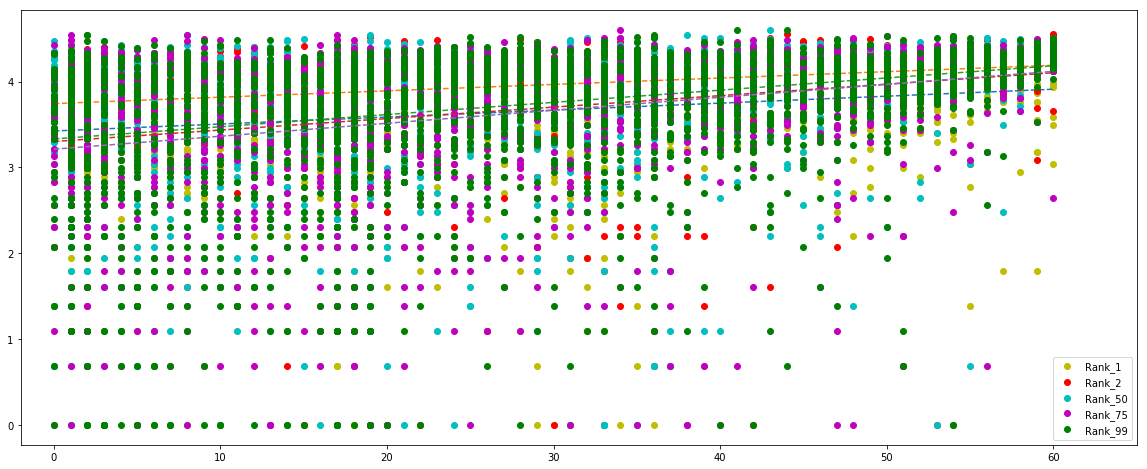

In [80]:
# year = range(1957,2020)
x = range(0,61)
z = []
#Rank 1
for i in x:
    z.append(0.00810675*i + 3.425281887889205)

#rank 2
x_2 = range(0,61)
z_2 = []
for i in x_2:
    z_2.append(0.00744161*i + 3.744144065893446)
    
#rank 50
x_3 = range(0,61)
z_3 = []
for i in x_3:
    z_3.append(0.01421105*i + 3.332333628185781)

#rank 75
x_4 = range(0,61)
z_4 = []
for i in x_4:
    z_4.append(0.01335598*i + 3.302456402249089)

#rank 99
x_99 = range(0,61)
z_99 = []
for i in x_99:
    z_99.append(0.01511146*i + 3.2129812786552447)
    

plt.figure(figsize=(20, 8))
# plt.plot(data['Title'], data['popularity'], '--')
plt.plot(data['Year_diff'], data['Log_popularity'], 'yo',label='Rank_1')
plt.plot(x,z,'--')
plt.plot(data_2['Year_diff'], data_2['Log_popularity'], 'ro', label='Rank_2')
plt.plot(x_2,z_2,'--')
plt.plot(data_3['Year_diff'] , data_3['Log_popularity'], 'co',label='Rank_50')
plt.plot(x_3,z_3,'--')
plt.plot(data_4['Year_diff'] , data_4['Log_popularity'], 'mo',label='Rank_75')
plt.plot(x_4,z_4,'--')
plt.plot(data_99['Year_diff'] , data_99['Log_popularity'], 'go',label='Rank_99')
plt.plot(x_99,z_99,'--')
plt.xlim(-2, 65)

#plt.xticks(range(1960, 2019))
plt.legend()
plt.show()